In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [219]:
data = pd.read_csv("Fish.csv")

In [220]:
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [221]:
data.shape

(159, 7)

In [222]:
data.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [223]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [224]:
data.duplicated(['Weight','Length1','Height','Width']).sum()

np.int64(0)

In [225]:
data.value_counts().head()

Species  Weight  Length1  Length2  Length3  Height   Width 
Bream    242.0   23.2     25.4     30.0     11.5200  4.0200    1
         290.0   24.0     26.3     31.2     12.4800  4.3056    1
         340.0   23.9     26.5     31.1     12.3778  4.6961    1
                 29.5     32.0     37.3     13.9129  5.0728    1
         363.0   26.3     29.0     33.5     12.7300  4.4555    1
Name: count, dtype: int64

6


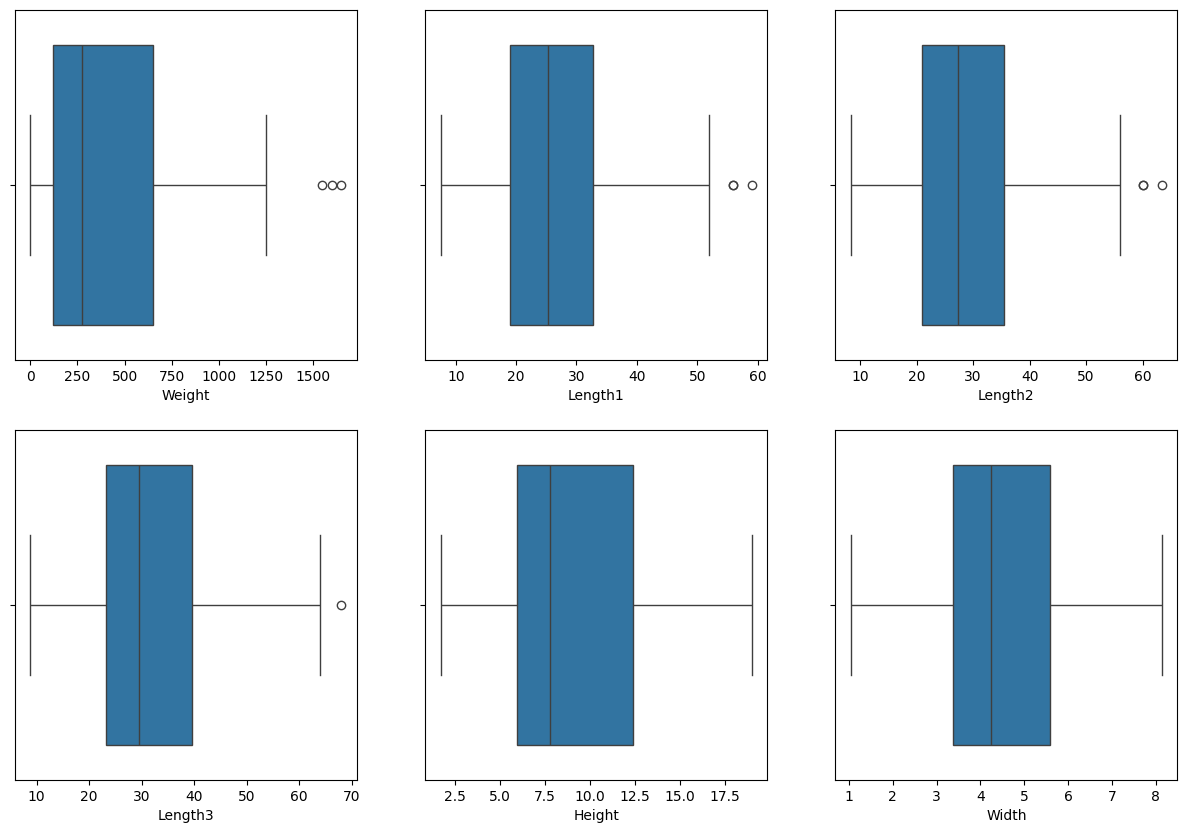

In [ ]:
plt.figure(figsize=(15,10))

num_cols = len(data.select_dtypes('number').columns)
print(num_cols)

count = 1
for i in data.select_dtypes('number').columns:
    plt.subplot(2, 3, count)
    sns.boxplot(data, x=i)
    count += 1

plt.show()

In [ ]:
for i in data.select_dtypes('number').columns:
    li = data[['Weight', 'Length1', 'Length2', 'Length3']]
    if i in li:
        data[i] = data[i].clip(lower=data[i].quantile(0.03), upper=data[i].quantile(0.97))

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

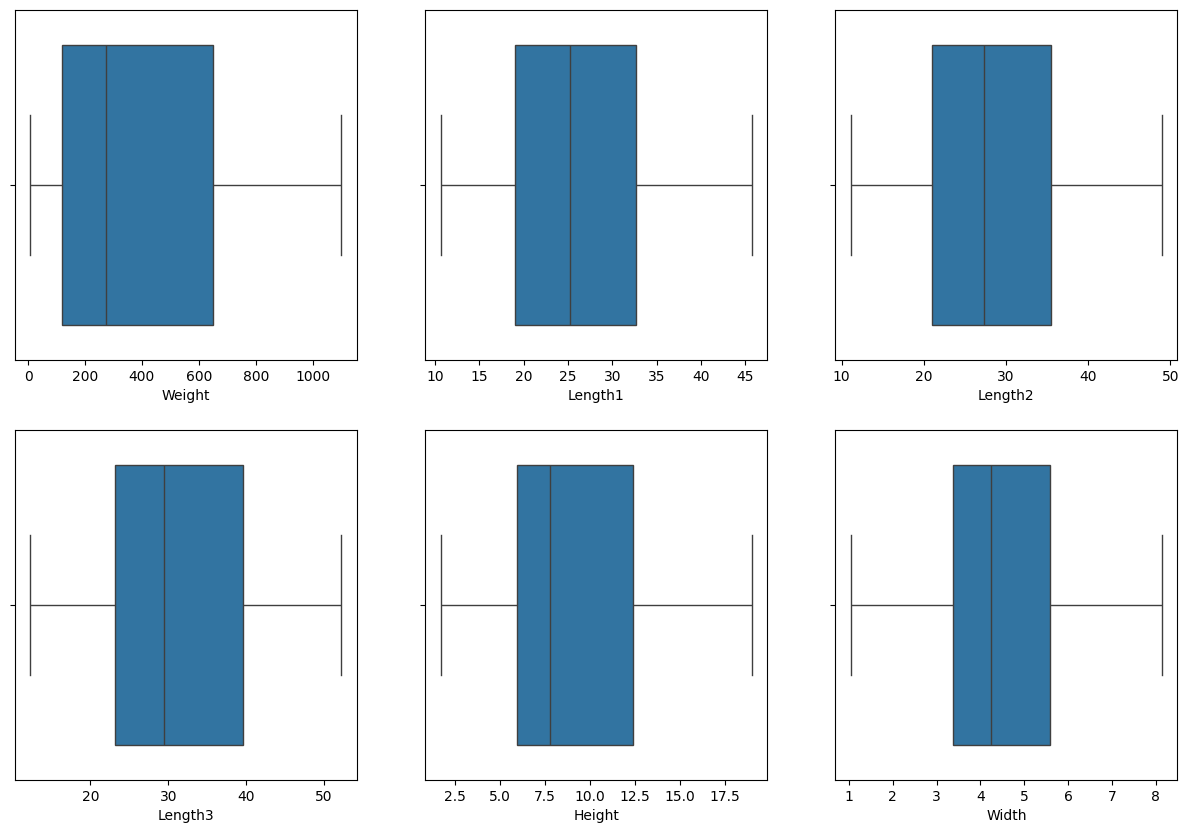

In [228]:
plt.figure(figsize=(15,10))

count = 1
for i in data.select_dtypes('number').columns:
    plt.subplot(2, 3, count)
    sns.boxplot(data, x=i)
    count += 1

plt.tight_layout

<Axes: xlabel='Species', ylabel='count'>

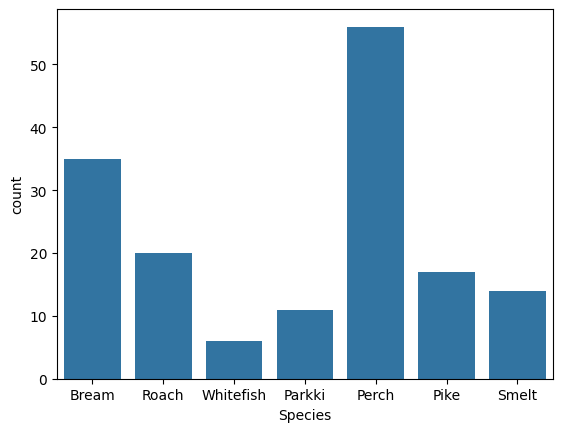

In [229]:
sns.countplot(data,x=data.Species)

In [230]:
x = data.drop(columns=['Species'])
y = data.Species

In [231]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, shuffle=True, random_state=0)
lg = LogisticRegression()

In [232]:
lg.fit(x_train,y_train)

c:\Users\sevug\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [233]:
preds = lg.predict(x_test)
preds

array(['Bream', 'Smelt', 'Perch', 'Roach', 'Perch', 'Perch', 'Perch',
       'Pike', 'Bream', 'Perch', 'Perch', 'Pike', 'Perch', 'Perch',
       'Parkki', 'Roach', 'Perch', 'Pike', 'Perch', 'Bream', 'Parkki',
       'Perch', 'Perch', 'Pike', 'Parkki', 'Bream', 'Bream', 'Perch',
       'Perch', 'Smelt', 'Bream', 'Perch', 'Pike', 'Pike', 'Bream',
       'Perch', 'Perch', 'Bream', 'Perch', 'Perch'], dtype=object)

In [234]:
from sklearn.metrics import accuracy_score, f1_score
f1 = f1_score(y_test,preds,average='weighted')
accuracy = accuracy_score(y_test,preds)
print(f"{f1:.2f}")
print(f"{accuracy:.2f}")

0.79
0.82


In [235]:
import pickle
pickle.dump(lg,open(r"C:\Users\sevug\Desktop\New folder\bigdatahandson\fish_classification\Testing\logistic_regression.pkl",'wb'))

In [236]:
len(data.columns)

7

In [237]:
x_train_v, x_test_v, y_train_v, y_test_v = x_train.copy(), x_test.copy(), y_train.copy(), y_test.copy()

In [238]:
x_train_v.var(axis=0)

Weight     101228.704816
Length1        83.514297
Length2        96.529789
Length3       115.286102
Height         19.660837
Width           2.871680
dtype: float64

In [239]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_x_train = scaler.fit_transform(x_train_v)

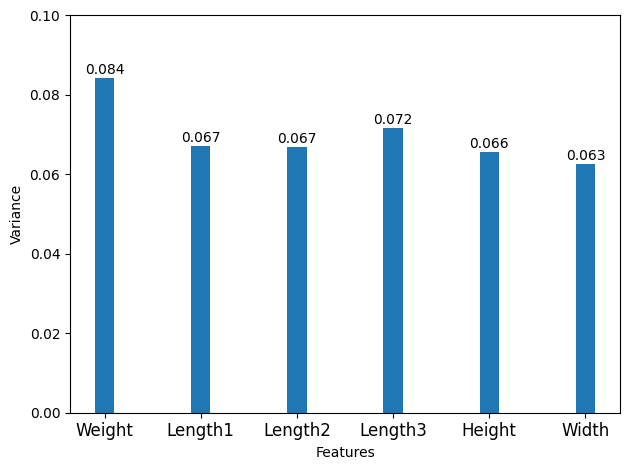

In [ ]:
fig, ax = plt.subplots()

x_value = x.columns
y_value = scaled_x_train.var(axis=0)

ax.bar(x_value,y_value,width=0.2)
ax.set_xlabel("Features")
ax.set_ylabel("Variance")
ax.set_ylim(0, 0.1)
ax.set_xticks(x_value)
ax.set_xticklabels(x_value, fontsize=12)

for i, v in enumerate(y_value):
    plt.text(x=i, y=v+0.001, s=str(round(v,3)), ha='center')

plt.tight_layout()

In [241]:
sel_x_train_v = x_train_v.drop(['Length2'], axis=1)
sel_x_test_v = x_test_v.drop(['Length2'], axis=1)

lg.fit(sel_x_train_v, y_train_v)
var_preds = lg.predict(sel_x_test_v)
f1_score_var = round(f1_score(y_test_v, var_preds, average='weighted'), 3)
print(f1_score_var)

0.789


c:\Users\sevug\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
